<a href="https://colab.research.google.com/github/komkovairisha/Python/blob/main/homework_workshop_10_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

**Дополнительное задание к Задаче 44:**

В ячейке ниже представлен код генерирующий DataFrame, которая состоит всего из 1 столбца. Ваша задача перевести его в one hot вид. Сможете ли вы это сделать без get_dummies?


import random

lst = ['robot'] * 10

lst += ['human'] * 10

random.shuffle(lst)

data = pd.DataFrame({'whoAmI': lst})

data.head() 



Статья про "one hot" https://colab.research.google.com/drive/1qKamnDiRmpRZkpiqWPkunBdAhmzhMcGz?usp=sharing

Добавить one hot к изначальной таблице


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import random
lst = ['robot'] * 10
lst += ['human'] * 10
random.shuffle(lst)
data = pd.DataFrame({'whoAmI':lst})
data.head()

,whoAmI
0,human
1,robot
2,robot
3,human
4,human


In [ ]:
data['tmp'] = 1
data.set_index([data.index, 'whoAmI'], inplace=True)
data = data.unstack(level=-1, fill_value = 0).astype(int)
data.columns = data.columns.droplevel()
data.columns.name = None
print(data)

    human  robot
0       1      0
1       0      1
2       0      1
3       1      0
4       1      0
5       1      0
6       1      0
7       0      1
8       0      1
9       0      1
10      0      1
11      0      1
12      1      0
13      1      0
14      1      0
15      0      1
16      1      0
17      1      0
18      0      1
19      0      1


**Задача 44**

Создать новый столбец height_group в таблице с пингвинами, который будет отвечать за показатель длины клюва пингвина. high - высокий(от 42), middle - средний(от 35 до 42), low - низкий(до 35).

Изобразить гистограмму по flipper_length_mm с оттенком height_group.

In [ ]:
import seaborn as sns

In [ ]:
peng = sns.load_dataset('penguins')

In [ ]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
peng.loc[peng['bill_length_mm'] <= 35, 'height_group'] = 'low'
peng.loc[(peng['bill_length_mm'] > 35) & (peng['bill_length_mm'] <= 42),
'height_group'] = 'middle'
peng.loc[peng['bill_length_mm'] > 42, 'height_group'] = 'high'

In [ ]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,height_group
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,middle
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,middle
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,middle
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,middle


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

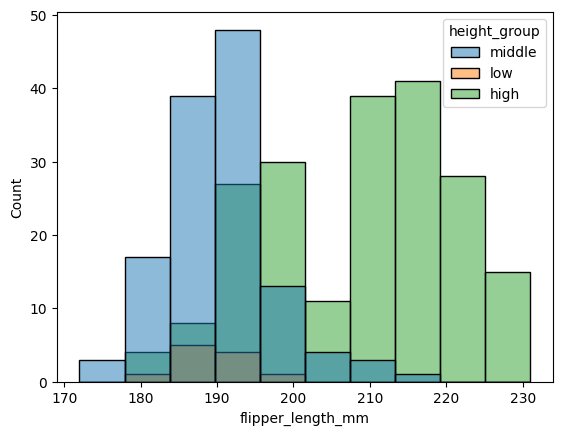

In [ ]:
sns.histplot(data=peng, x='flipper_length_mm', hue="height_group")